#
**Librerias**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

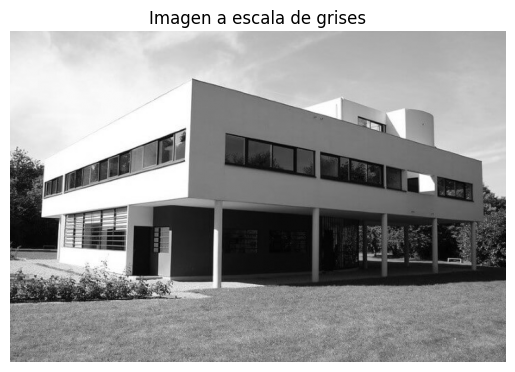

In [3]:
imagen = cv2.imread('casa.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen a escala de grises')
plt.axis('off')
plt.show()

#
**Sobel**

In [4]:
sobel_x = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.magnitude(sobel_x, sobel_y)

#
**Prewitt**

In [5]:
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
prewitt_x = cv2.filter2D(imagen, -1, kernel_x)
prewitt_y = cv2.filter2D(imagen, -1, kernel_y)
prewitt = cv2.magnitude(prewitt_x.astype(np.float32), prewitt_y.astype(np.float32))

#
**Canny**

In [6]:
canny = cv2.Canny(imagen, 100, 200)

#
**Contornos y analisis**

In [7]:
def extraer_info(nombre, imagen_binaria, max_contornos=3):
    contornos, _ = cv2.findContours(imagen_binaria.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:max_contornos]

    print(f"\nMétodo: {nombre}")
    for i, contorno in enumerate(contornos):
        area = cv2.contourArea(contorno)
        perimetro = cv2.arcLength(contorno, True)
        momentos = cv2.moments(contorno)
        momentos_hu = cv2.HuMoments(momentos).flatten()

        momentos_hu = [round(m, 6) for m in momentos_hu]

        print(f"  Contorno {i+1}:")
        print(f"    Área: {area}")
        print(f"    Perímetro: {perimetro}")
        print(f"    Momentos de Hu: {momentos_hu}")

#
**Sobel y Prewitt a binario**

In [8]:
_, sobel_binaria = cv2.threshold(sobel.astype(np.uint8), 127, 255, cv2.THRESH_BINARY)
_, prewitt_binaria = cv2.threshold(prewitt.astype(np.uint8), 127, 255, cv2.THRESH_BINARY)

#
**Info de contornos**

In [9]:
extraer_info("Sobel", sobel_binaria)


Método: Sobel
  Contorno 1:
    Área: 130560.5
    Perímetro: 16425.899740695953
    Momentos de Hu: [0.41795, 0.110047, 0.002858, 0.00061, -0.0, 1.2e-05, 1e-06]
  Contorno 2:
    Área: 13173.0
    Perímetro: 3112.654222846031
    Momentos de Hu: [0.75986, 0.540989, 0.021924, 0.01832, 0.000367, 0.013395, -4e-06]
  Contorno 3:
    Área: 10116.0
    Perímetro: 5283.0645924806595
    Momentos de Hu: [1.299704, 1.379553, 0.110849, 0.008894, -0.000279, -0.01014, 2e-05]


In [10]:
extraer_info("Prewitt", prewitt_binaria)


Método: Prewitt
  Contorno 1:
    Área: 3630.0
    Perímetro: 1009.1513631343842
    Momentos de Hu: [0.547543, 0.236004, 0.087728, 0.115118, 0.011562, 0.055889, -0.000397]
  Contorno 2:
    Área: 1432.0
    Perímetro: 1392.523946762085
    Momentos de Hu: [1.017717, 0.689423, 0.674699, 0.711613, 0.483357, 0.589235, -0.097454]
  Contorno 3:
    Área: 801.5
    Perímetro: 473.3452333211899
    Momentos de Hu: [0.344151, 0.02412, 0.041486, 0.031359, 0.00113, 0.004869, 5.8e-05]


In [11]:
extraer_info("Canny", canny)


Método: Canny
  Contorno 1:
    Área: 6728.0
    Perímetro: 476.534051656723
    Momentos de Hu: [0.431264, 0.156859, 0.003354, 0.001976, 5e-06, 0.000775, -0.0]
  Contorno 2:
    Área: 5599.0
    Perímetro: 368.71067690849304
    Momentos de Hu: [0.289157, 0.055612, 0.000105, 3.4e-05, 0.0, 8e-06, -0.0]
  Contorno 3:
    Área: 3405.5
    Perímetro: 275.1543279886246
    Momentos de Hu: [0.24801, 0.033602, 7.1e-05, 1.5e-05, 0.0, 3e-06, 0.0]


#
**Resultados**

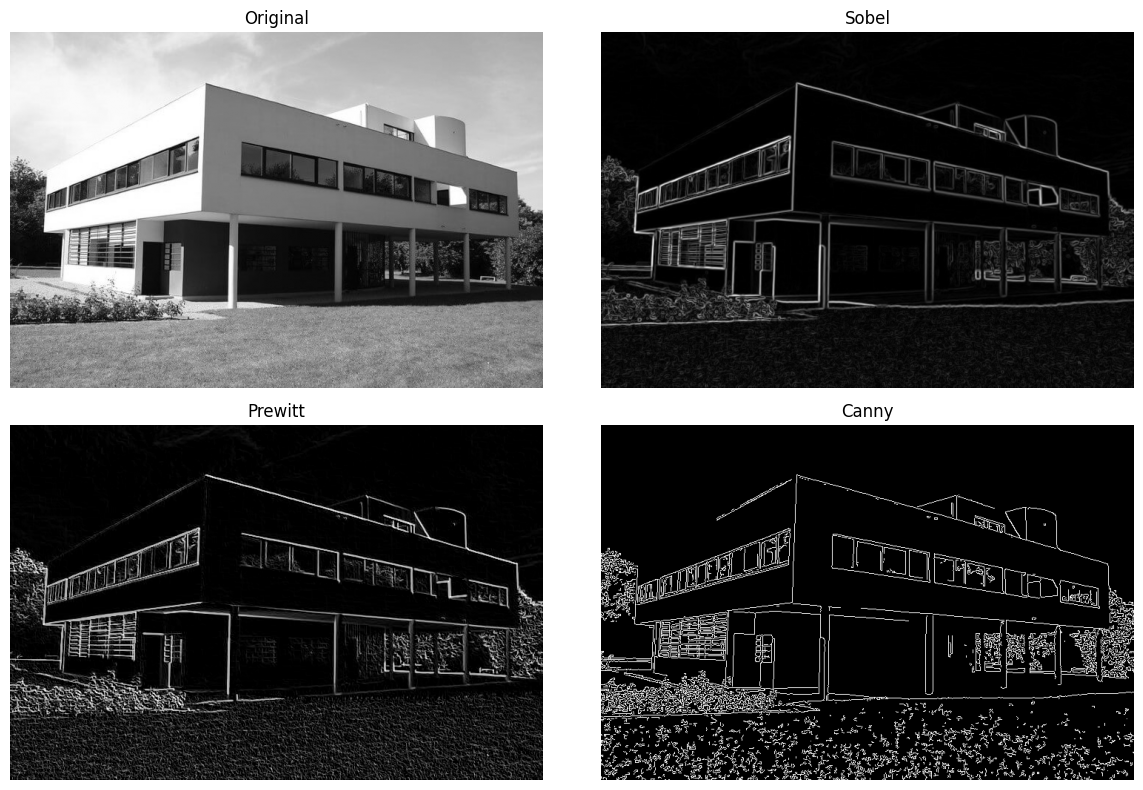

In [12]:
plt.figure(figsize=(12, 8))
titulos = ['Original', 'Sobel', 'Prewitt', 'Canny']
imagenes = [imagen, sobel, prewitt, canny]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(imagenes[i], cmap='gray')
    plt.title(titulos[i])
    plt.axis('off')

plt.tight_layout()
plt.show()